In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import re
import os
import datetime as dt

In [ ]:


df=pd.read_excel(r'C:\project2\mini\data\2024_목차_이용안내_총괄표_최종_628.xlsx',sheet_name='나. 노인의료복지시설 총괄표',header=[0,1,2,3,4])

# 컬럼명 재지정
df.columns=['_'.join(col).replace('\n',"").replace('(세대)','').replace('(분양)','').replace('(입주)','').strip("_") for col in df.columns]
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 0_level_1_시 · 도_Unnamed: 0_level_3_Unnamed: 0_level_4','시도')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 1_level_1_65세 이상노인인구(2023.12.31주민등록인구기준)_Unnamed: 1_level_3_Unnamed: 1_level_4','65세이상인구')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 2_level_1_계_시설수_Unnamed: 2_level_4','시설수_계')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 3_level_1_계_입 소 인 원_정원','입소정원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 4_level_1_계_입 소 인 원_현원','입소현원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 5_level_1_계_종사자수_Unnamed: 5_level_4','노인의료복지시설_종사자수')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 6_level_1_노인요양시설_시설수_Unnamed: 6_level_4','노인요양시설_시설수')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 7_level_1_노인요양시설_입소인원_정원','노인요양시설_정원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 8_level_1_노인요양시설_입소인원_현원','노인요양시설_현원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 9_level_1_노인요양시설_종사자수_Unnamed: 9_level_4','노인요양시설_종사자수')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 10_level_1_노인요양공동생활가정_시설수_Unnamed: 10_level_4','노인요양공동생활가정_시설수')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 11_level_1_노인요양공동생활가정_입소인원_정원','노인요양공동생활가정_정원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_Unnamed: 12_level_1_노인요양공동생활가정_입소인원_현원','노인요양공동생활가정_현원')
df.columns=df.columns.str.replace('나. 노인의료복지시설 총괄표_(단위 : 개소, 명)_Unnamed: 13_level_2_종사자수_Unnamed: 13_level_4','노인요양공동생활가정_종사자수')
df.set_index('시도',inplace=True)

df

,65세이상인구,시설수_계,입소정원,입소현원,노인의료복지시설_종사자수,노인요양시설_시설수,노인요양시설_정원,노인요양시설_현원,노인요양시설_종사자수,노인요양공동생활가정_시설수,노인요양공동생활가정_정원,노인요양공동생활가정_현원,노인요양공동생활가정_종사자수
시도,,,,,,,,,,,,,
합계,9858810,6139,242974,196269,140182,4525,228495,183638,130280,1614,14479,12631,9902
서울,1768649,472,16158,14596,10508,232,14010,12618,8997,240,2148,1978,1511
부산,749610,112,6364,5001,3543,90,6115,4813,3401,22,249,188,142
대구,468362,262,9784,8305,6212,148,8764,7384,5441,114,1020,921,771
인천,505932,496,20214,16183,11593,412,19464,15569,11072,84,750,614,521
광주,235327,102,3982,3075,2227,89,3870,2978,2145,13,112,97,82
대전,246533,152,7706,5930,4183,110,7333,5591,3946,42,373,339,237
울산,177297,64,2534,2093,1512,45,2364,1931,1376,19,170,162,136
세종,43006,21,884,650,496,18,857,626,473,3,27,24,23


In [29]:
# 컬럼 생성

df['종사자_노인요양시설_현원']=df['노인요양시설_현원']/df['노인요양시설_종사자수']
df['종사자_노인요양공동생활가정_현원']=df['노인요양공동생활가정_현원']/df['노인요양공동생활가정_종사자수']


q=df['종사자_노인요양시설_현원']
w=df['종사자_노인요양공동생활가정_현원']

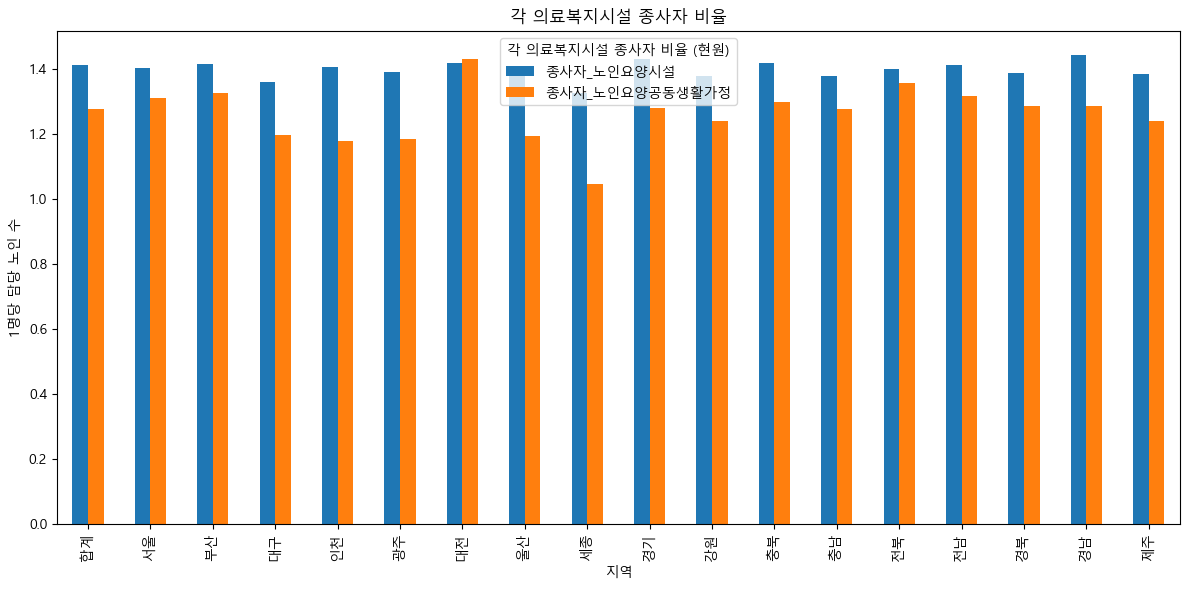

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# 시리즈들을 하나의 데이터프레임으로 합치기
combined = pd.concat([q,w], axis=1)
combined.columns = ['종사자_노인요양시설', '종사자_노인요양공동생활가정']

# 그래프 그리기
plt.rc('font', family='Malgun Gothic')
combined.plot(kind='bar', figsize=(12, 6))
plt.title('각 의료복지시설 종사자 비율')
plt.ylabel('1명당 담당 노인 수')
plt.xlabel('지역')
plt.legend(title='각 의료복지시설 종사자 비율 (현원)')
plt.tight_layout()
plt.show()